# Final Project Sanbercode Batch 33
### by : Muhammad Fadhli Mubarak

In [35]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## Persiapan Data

In [36]:
#import data csv
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### EDA Part 1

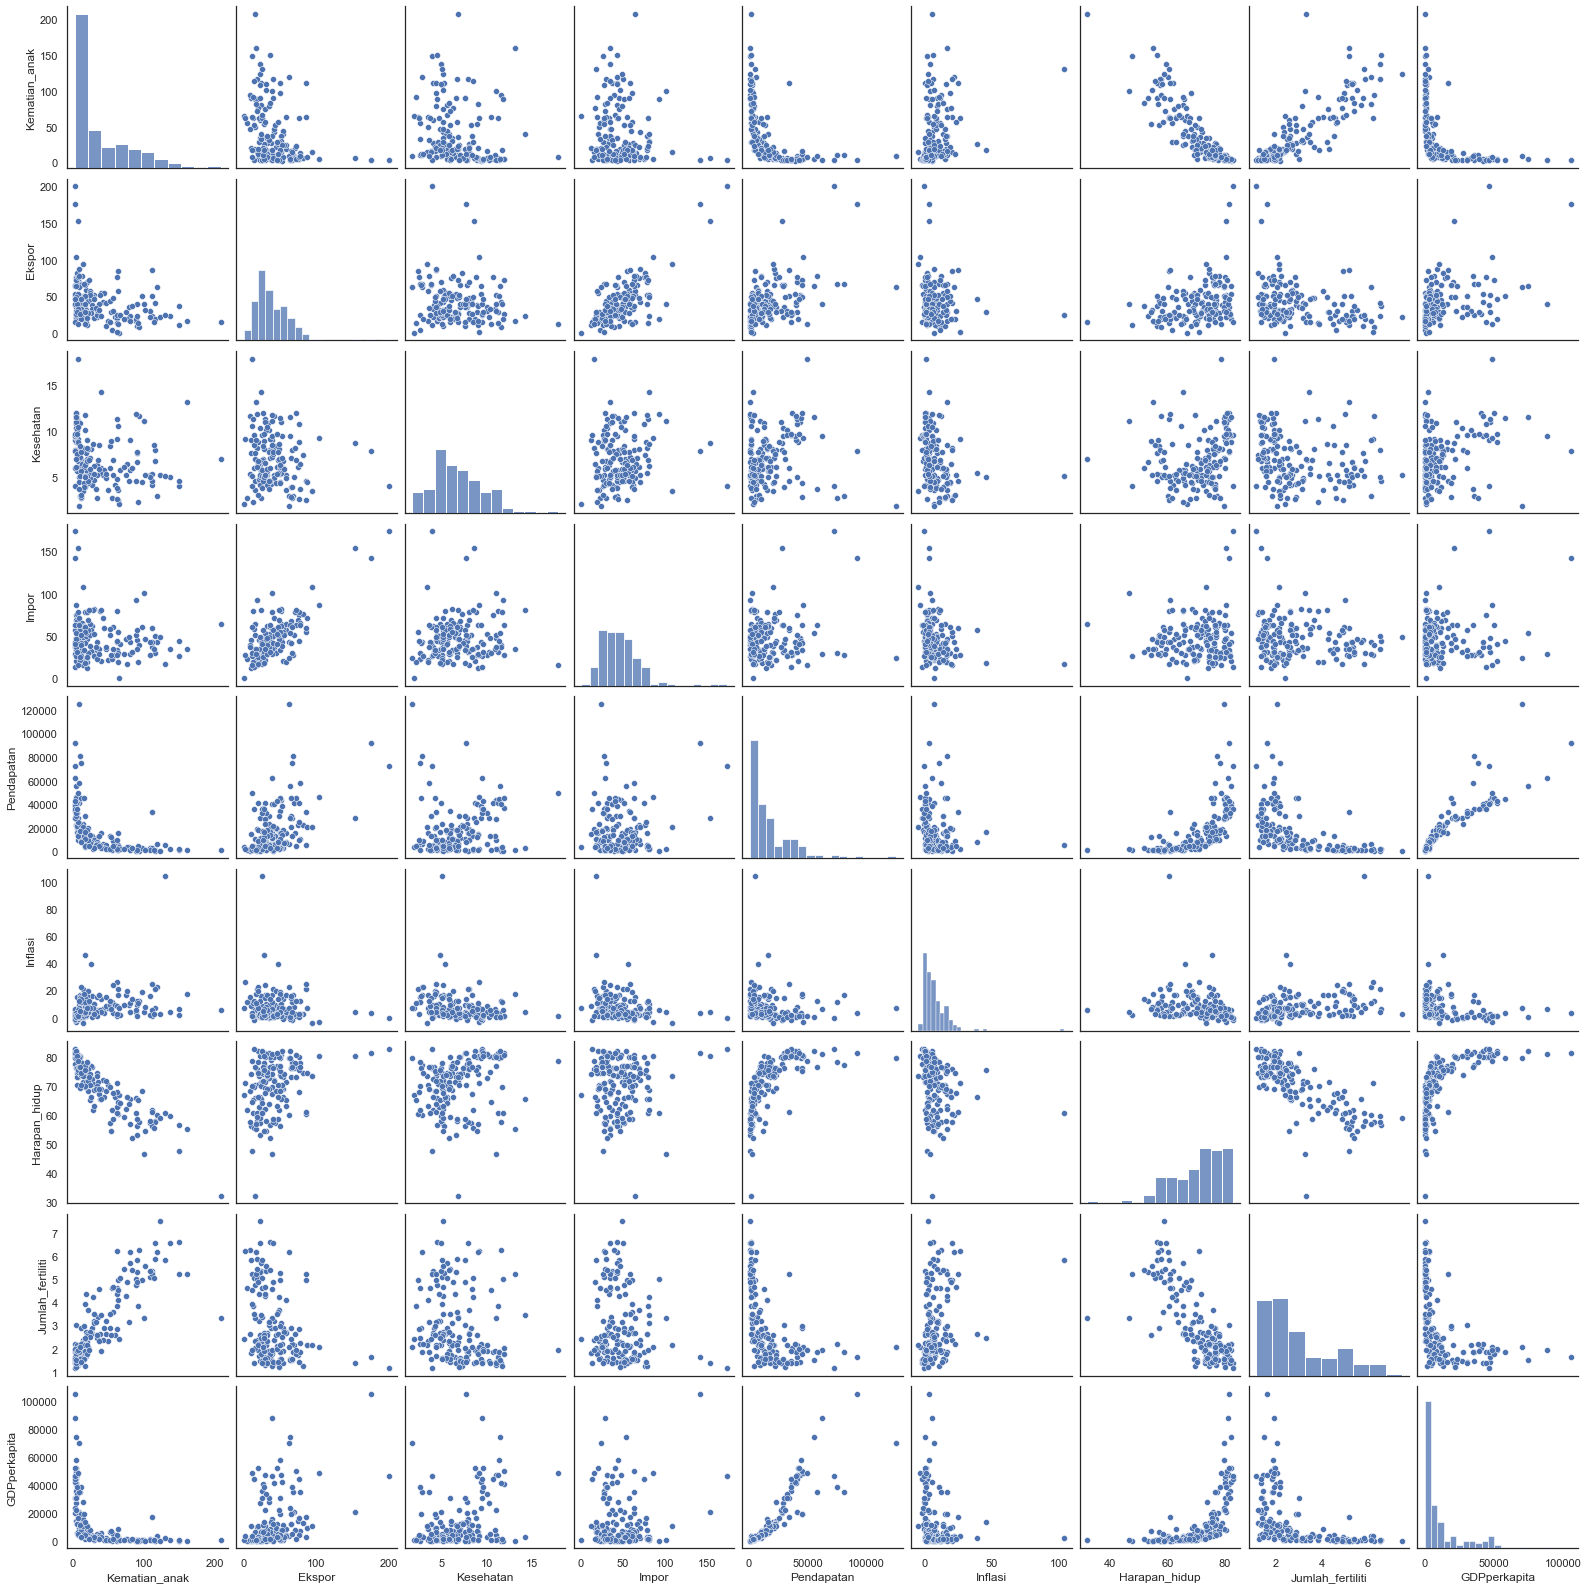

In [38]:
#Melihat semua fitur dari semua data dengan multivairate analysis
sns.pairplot(df)
plt.show()

* Feature Selection

Analisis : 2 features yang akan saya tinjau yaitu Kesehatan dan Pendapatan, karena pada multivariate analysis ini dapat dilihat korelasi yang cukup baik antarkedua variabel tersebut

### Data Cleaning

1. Handling Missing Value

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [40]:
#Cek apakah ada data yang bolong
print(df.isnull().sum())

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64


2. Handling Outliers

Dapat dilihat bahwa tidak ada missing value pada data2 tersebut

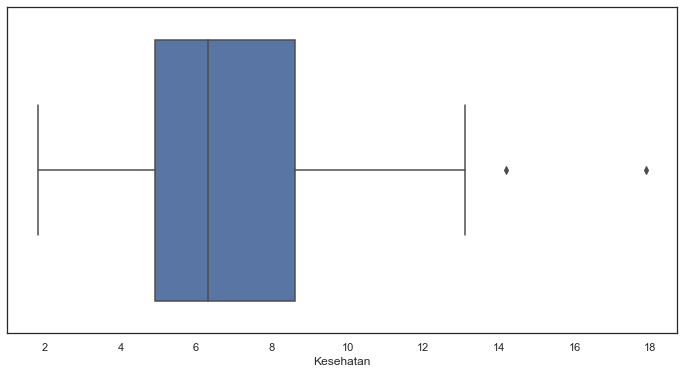

In [41]:
#cek data outlier secara visual
sns.set_theme(style="white")
plt.figure(figsize = (12,6))

ax = sns.boxplot(x=df["Kesehatan"], data=df)
plt.show()

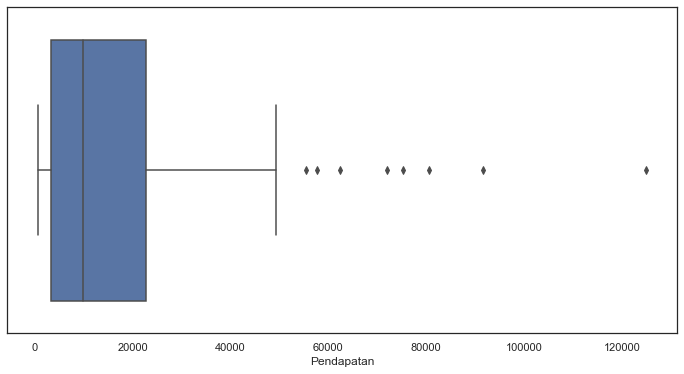

In [42]:
sns.set_theme(style="white")
plt.figure(figsize = (12,6))

ax = sns.boxplot(x=df["Pendapatan"], data=df)
plt.show()

Dapat dilihat bahawa kedua variabel tersebut memiliki outliers, maka selanjutnya kita perlu handling outliers tersebut

In [43]:
#handling outliers
def lower_upper(x) :
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

def outliers(x) :
    lower_bound, upper_bound = lower_upper(x)
    return x[np.where((x>upper_bound) | (x<lower_bound))]

def remove_outliers(x) :
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    df_final = np.where(x>upper_bound, upper_bound,
                        np.where(x<lower_bound, lower_bound,
                          x))
    return df_final

print(outliers(df['Kesehatan'].values))
print(outliers(df['Pendapatan'].values))

df_new = df[['Kesehatan', 'Pendapatan']].apply(remove_outliers)

df_new

[14.2 17.9]
[ 80600  75200  91700  62300 125000  72100  55500  57600]


,Kesehatan,Pendapatan
0,7.58,1610.0
1,6.55,9930.0
2,4.17,12900.0
3,2.85,5900.0
4,6.03,19100.0
...,...,...
162,5.25,2950.0
163,4.91,16500.0
164,6.84,4490.0
165,5.18,4480.0


In [44]:
print(df_new.isnull().sum())

Kesehatan     0
Pendapatan    0
dtype: int64


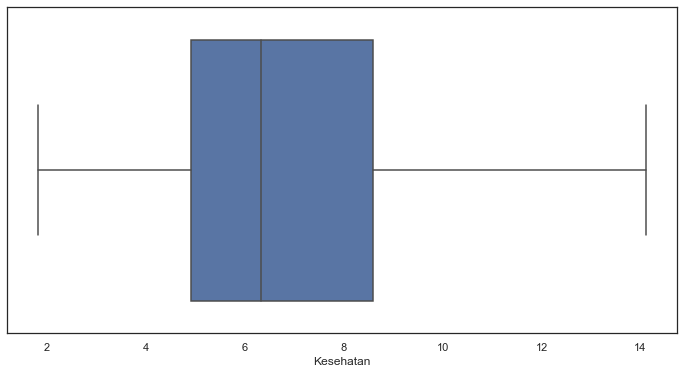

In [45]:
#cek kembali data hasil handling outliers
sns.set_theme(style="white")
plt.figure(figsize = (12,6))

ax = sns.boxplot(x=df_new["Kesehatan"], data=df_new)
plt.show()

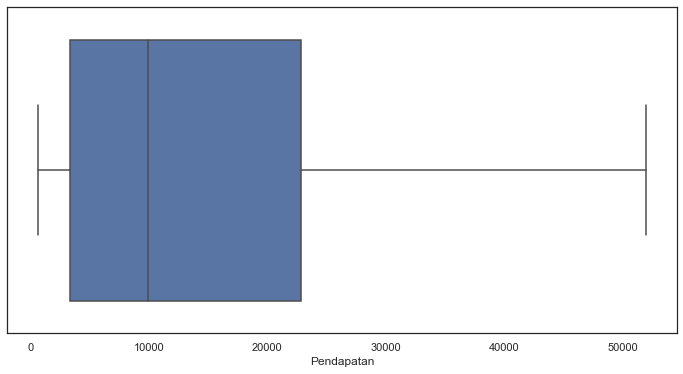

In [46]:
sns.set_theme(style="white")
plt.figure(figsize = (12,6))

ax = sns.boxplot(x=df_new["Pendapatan"], data=df_new)
plt.show()

Handling outliers yang dilakukan yaitu dengan mengubah data outliers menjadi data batas terdekat dari data tersebut (batas atas atau bawah)

### Univariate Analysis

Histogram


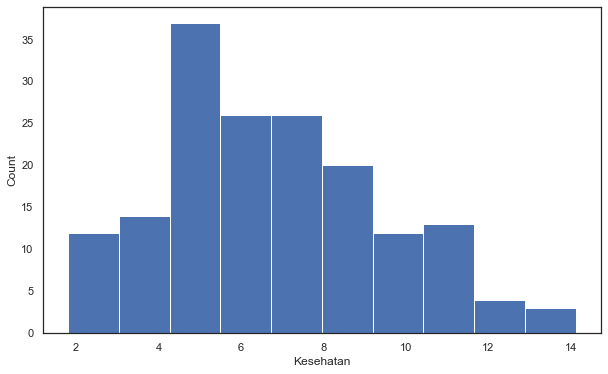

In [47]:
#Univariate Analysis
fig, ax = plt.subplots(figsize = (10,6))
print('Histogram')
plt.hist(df_new['Kesehatan'])
ax.set_xlabel('Kesehatan')
ax.set_ylabel('Count')

plt.show()

Histogram


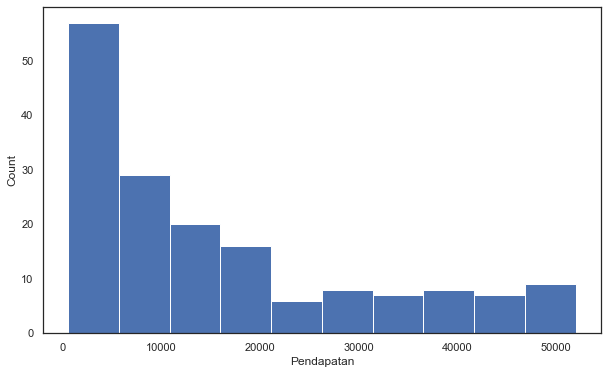

In [48]:
fig, ax = plt.subplots(figsize = (10,6))
print('Histogram')
plt.hist(df_new['Pendapatan'])
ax.set_xlabel('Pendapatan')
ax.set_ylabel('Count')

plt.show()

Analisis : pada univariate analysis untuk data kesehatan cenderung merata di tengah, dan untuk pendapatan cenderung rendah secara keseluruhan untuk semua negara

### Bivariate Analysis

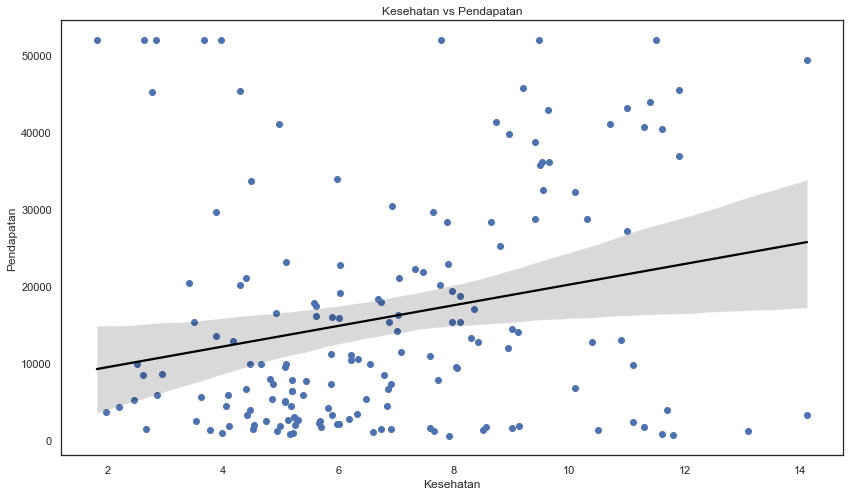

In [49]:
#Bivariate Analysis
fig, ax = plt.subplots(figsize = (14,8))

x = df_new['Kesehatan']
y = df_new['Pendapatan']

map = plt.scatter(x, y)
sns.regplot(x='Kesehatan', y='Pendapatan', color = 'black', data=df_new, scatter=False)

ax.set_title('Kesehatan vs Pendapatan')

plt.show()

Bersarkan hasil visualisasi dengan Bivariate analysis, dapat dilihat ada korelasi positif pada kedua variabel/parameter yang ditinjau

## Clustering

In [50]:
#Scale Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(scaled_data, columns=['Kesehatan', 'Pendapatan'])
df_scaled

,Kesehatan,Pendapatan
0,0.296013,-0.943936
1,-0.091190,-0.395181
2,-0.985893,-0.199291
3,-1.482114,-0.660984
4,-0.286671,0.209637
...,...,...
162,-0.579893,-0.855555
163,-0.707708,0.038151
164,0.017828,-0.753982
165,-0.606208,-0.754642


In [51]:
#Menentukan number of cluster dengan elbow method
#Elbow Method
def elbowMethod(X, k_min=1, k_max=10, save=False):
    K_range = range(k_min,k_max+1)

    result = []
    for k in K_range:
        model = KMeans(n_clusters = k, random_state=42)
        model.fit(X)
        result.append(model.inertia_)
        
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.plot(K_range, result, marker='o')
    
    plt.xticks(K_range)
    plt.title('The Elbow Method')
    plt.xlabel('n-Cluster')
    plt.ylabel('WCSS')
    plt.show()

Elbow graph


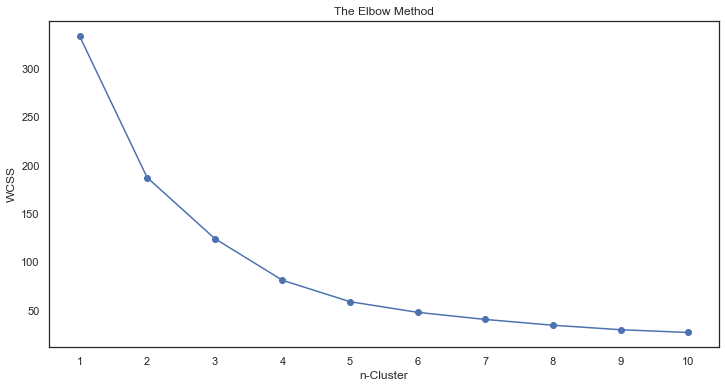

In [52]:
print('Elbow graph')
elbowMethod(df_scaled)

In [53]:
#cek sihoutte score
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for cluster in n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50,random_state= 100)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.49249233445910684
For n_clusters=3, the silhouette score is 0.4167614438211323
For n_clusters=4, the silhouette score is 0.4678271379063373
For n_clusters=5, the silhouette score is 0.4446018266062627
For n_clusters=6, the silhouette score is 0.4024022124023497
For n_clusters=7, the silhouette score is 0.4119101505450466
For n_clusters=8, the silhouette score is 0.41549292561680623


Berdasarkan data dari elbow method dan silhoutte score, maka dipilih jumlah cluster yang digunakan yaitu sebanyak 4 buah cluster

### number of cluster = 4

In [54]:
clas = KMeans(max_iter=150, n_clusters=4, random_state=50)
clas.fit(df_scaled)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [55]:
clas.labels_

array([0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 3, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0,
       0, 3, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 1,
       1, 2, 0, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 3, 2, 2, 2, 0, 0,
       0, 3, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 3, 2, 0, 2, 2, 2, 0, 1, 3, 2, 2, 0, 2, 3, 2, 0, 2,
       0, 3, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 3, 1, 1, 0, 2, 2, 2, 2, 2, 2])

In [56]:
def clustering_scatter_plot(col1, col2):
    plt.figure(figsize=(18,8))
    plt.subplots()
    sns.scatterplot(x=col1, y=col2, hue='clas', data='df_scaled', pallete=['blue', 'green', 'red','yellow'])

In [57]:
df_new['Cluster_Id'] = clas.labels_
df_new.head()

,Kesehatan,Pendapatan,Cluster_Id
0,7.58,1610.0,0
1,6.55,9930.0,2
2,4.17,12900.0,2
3,2.85,5900.0,2
4,6.03,19100.0,2


In [58]:
df_new.Cluster_Id.value_counts()

2    86
0    41
1    29
3    11
Name: Cluster_Id, dtype: int64

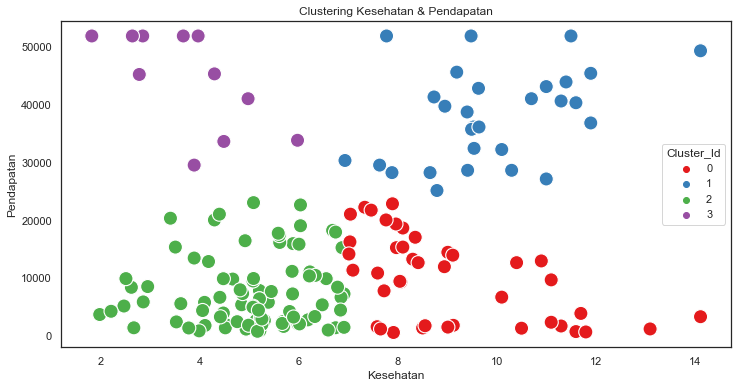

In [59]:
plt.figure(figsize = (12,6))
plt.title('Clustering Kesehatan & Pendapatan')
sns.scatterplot(x = 'Kesehatan', y = 'Pendapatan',s=200,hue='Cluster_Id',data = df_new,legend='full',palette="Set1",)
plt.show()

## Recommendation

Berdasarkan hasil clustering, cluster yang perlu diperhatikan yaitu cluster_id no 2, berwarna hijau, yaitu yang memiliki kesehatan dan pendapatan yang kecil

In [60]:
df_new[['Kesehatan','Pendapatan','Cluster_Id']].groupby('Cluster_Id').mean()

,Kesehatan,Pendapatan
Cluster_Id,,
0,9.031951,9940.804878
1,9.912414,38106.982759
2,5.061977,7644.069767
3,3.750909,44439.772727


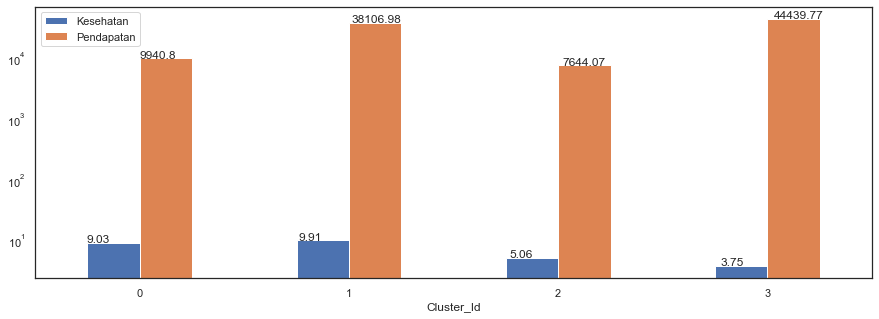

In [61]:
#data kesehatan dan pendapatan rata2 untuk tiap cluster
ax=df_new[['Kesehatan','Pendapatan','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.savefig('Cluster Mean')

### 5 Negara Terendah untuk masing-masing cluster

In [62]:
df_new.insert(0, 'Negara', df['Negara'])
print('cluster 0')
df_new[df_new['Cluster_Id']==0].sort_values(by = ['Kesehatan', 'Pendapatan'], ascending = [True, True]).head()

cluster 0


,Negara,Kesehatan,Pendapatan,Cluster_Id
143,Suriname,7.01,14200.0,0
86,Lebanon,7.03,16300.0,0
90,Lithuania,7.04,21100.0,0
92,"Macedonia, FYR",7.09,11400.0,0
67,Hungary,7.33,22300.0,0


In [63]:
print('cluster 1')
df_new[df_new['Cluster_Id']==1].sort_values(by = ['Kesehatan', 'Pendapatan'], ascending = [True, True]).head()

cluster 1


,Negara,Kesehatan,Pendapatan,Cluster_Id
138,South Korea,6.93,30400.0,1
74,Israel,7.63,29600.0,1
91,Luxembourg,7.77,51967.5,1
43,Czech Republic,7.88,28300.0,1
98,Malta,8.65,28300.0,1


In [64]:
print('cluster 2')
df_new[df_new['Cluster_Id']==2].sort_values(by = ['Kesehatan', 'Pendapatan'], ascending = [True, True]).head()

cluster 2


,Negara,Kesehatan,Pendapatan,Cluster_Id
107,Myanmar,1.97,3720.0,2
116,Pakistan,2.20,4280.0,2
38,"Congo, Rep.",2.46,5190.0,2
154,Turkmenistan,2.50,9940.0,2
70,Indonesia,2.61,8430.0,2


In [65]:
print('cluster 3')
df_new[df_new['Cluster_Id']==3].sort_values(by = ['Kesehatan', 'Pendapatan'], ascending = [True, True]).head()

cluster 3


,Negara,Kesehatan,Pendapatan,Cluster_Id
123,Qatar,1.81,51967.5,3
82,Kuwait,2.63,51967.5,3
115,Oman,2.77,45300.0,3
23,Brunei,2.84,51967.5,3
157,United Arab Emirates,3.66,51967.5,3


Negara yang dipilih yaitu 3 Negara terendah yang diurutkan berdasarkan kesehatan dan pendapatan pada cluster 2, yaitu :

In [66]:
df_final =df_new[df_new['Cluster_Id']==2].sort_values(by = ['Kesehatan', 'Pendapatan'], ascending = [True, True]).head(3)
df_final['Negara']
df_final.reset_index(drop=True).Negara[:3]

0        Myanmar
1       Pakistan
2    Congo, Rep.
Name: Negara, dtype: object

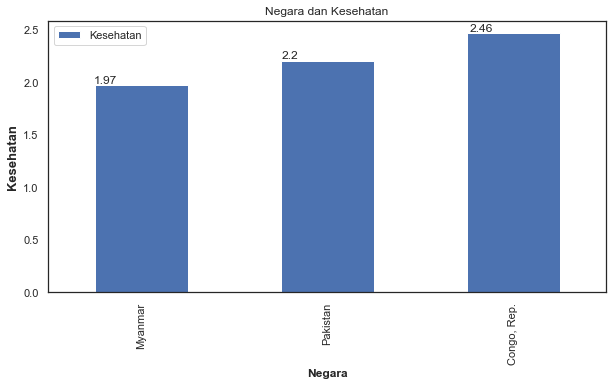

In [67]:
df_kesehatan = pd.DataFrame(df_final.groupby(['Negara'])['Kesehatan'].mean().sort_values(ascending=True))
ax=df_kesehatan.plot(kind='bar',figsize=(10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Negara dan Kesehatan')
plt.xlabel('Negara', fontweight = 'bold')
plt.ylabel('Kesehatan', fontsize= 13, fontweight='bold')
plt.savefig('Negara dan Kesehatan')

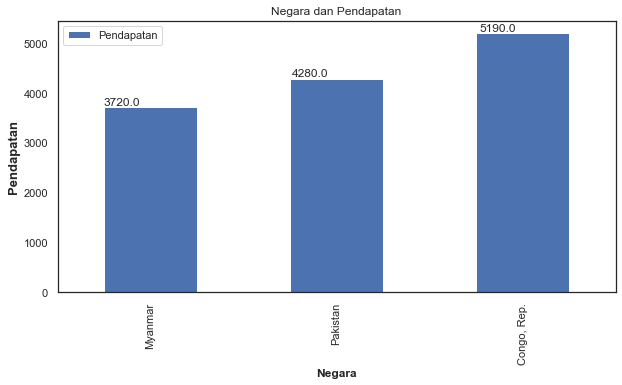

In [68]:
df_pendapatan = pd.DataFrame(df_final.groupby(['Negara'])['Pendapatan'].mean().sort_values(ascending=True))
ax=df_pendapatan.plot(kind='bar',figsize=(10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Negara dan Pendapatan')
plt.xlabel('Negara', fontweight = 'bold')
plt.ylabel('Pendapatan', fontsize= 13, fontweight='bold')
plt.savefig('Negara dan Pendapatan')

Dapat disimpulkan bahwa Negara yang menerima bantuan yaitu : Myanmar, Pakistan, Kongo